In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.calibration import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the data
data = pd.read_csv('../data/processed/Weather_processed.csv')

In [2]:
# Split the data into X and y
X = data.drop('weather_type', axis=1)
y = data['weather_type']

In [3]:
# One-hot encode the feature columns only
X = pd.get_dummies(X)

# encode the target column
label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)
y

array([1, 0, 3, ..., 0, 2, 1])

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [5]:
# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       955
           1       0.90      0.91      0.91       982
           2       0.94      0.93      0.94      1033
           3       0.93      0.90      0.92       990

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960



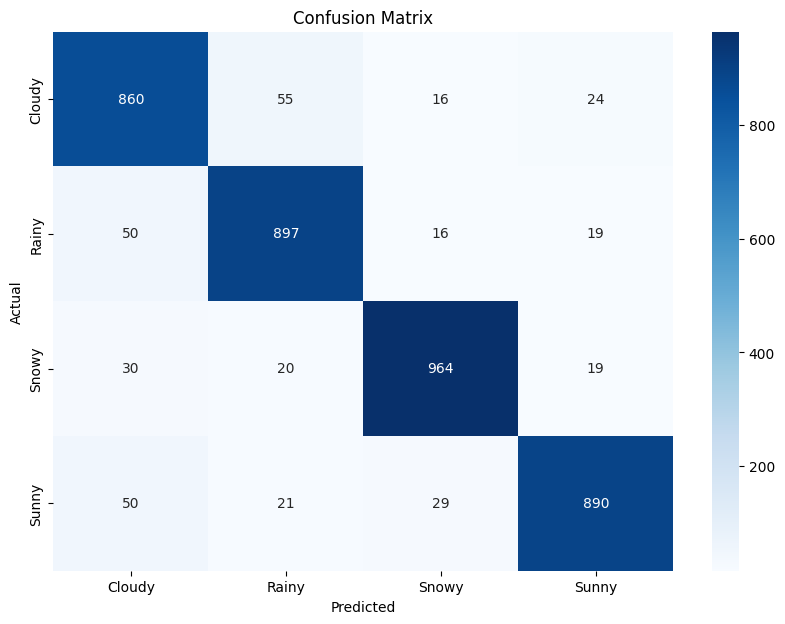

In [6]:
# Plot confusion matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder_y.classes_,
    yticklabels=label_encoder_y.classes_,
    )
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [7]:
# Decode the target column (optional)
y_pred_labels = label_encoder_y.inverse_transform(y_pred)
y_pred_labels

array(['Sunny', 'Sunny', 'Sunny', ..., 'Snowy', 'Sunny', 'Sunny'],
      dtype=object)

In [8]:
# Print the label mapping (optional)
label_mapping = dict(zip(label_encoder_y.classes_, label_encoder_y.transform(label_encoder_y.classes_)))
print("Label mapping:")
print(label_mapping)

Label mapping:
{'Cloudy': np.int64(0), 'Rainy': np.int64(1), 'Snowy': np.int64(2), 'Sunny': np.int64(3)}
